In [1]:
# Customer Churn prediction


import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# importing libraries 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve

from sklearn.model_selection import cross_val_score,GridSearchCV
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')


df=pd.read_csv(r'C:\ProgramData\CustomerChurn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.shape

(7043, 21)

In [3]:
# Important observations 
# 1)There are 7043 rows and 21 columns
# 2) As there are only 13 columns ,we do not require PCA 
# 2) Features are categorical as well as numeric

#1. CustomerID: Customer ID  for each customer
#2. gender:  male or a female customer
#3. SeniorCitizen: Whether the customer is a senior citizen or not 
#4. Partner: Whether the customer has a partner or not 
#5. Dependents: Whether the customer has dependents or not 
#6. Tenure: Number of months the customer has been associated  with the company
#7. PhoneService: Whether the customer has a phone service or not 
#8. MultipleLines: Whether the customer has multiple lines or not 
#9. InternetService: Whether Customer’s internet service provider is DSL, Fiber optic or None
#10. OnlineSecurity: Whether the customer has online security or not 
#11. OnlineBackup: Whether the customer has an online backup or not
#12. DeviceProtection: Whether the customer has device protection or not 
#13. TechSupport: Whether the customer has tech support or not
#14. StreamingTV: Whether the customer has streaming TV or not 
#15. MonthlyCharges: The amount charged to the customer monthly
#16. TotalCharges: The total amount charged to the customer

#17. Churn: Whether the customer churned or not 

In [4]:
# Exploratory Data Analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Above data shows there are 7043 rows and 21 columns ,all columns being of object datatype except
#MonthlyCharges which are of  float type and SenioCitizen,tenure which are of integer type


In [6]:
# Statistical summary
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
# Above description clearly shows that there are no missing values

In [8]:
# checking for null values in dataset

df.isnull().sum()

#  Clearly there are no null values in the dataset

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [10]:
# Dataset is clearly imbalanced.we need to work on it

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

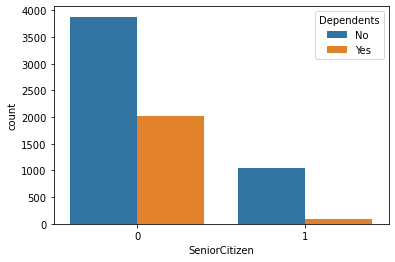

In [11]:
# Relationship between SeniorCitizen and Dependents

sns.countplot(x="SeniorCitizen", data=df, hue = 'Dependents')

In [12]:
# Above plot clearly shows that senior citizen have very less dependents

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

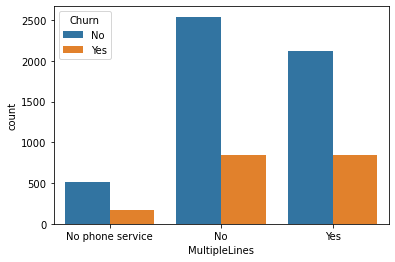

In [13]:
# Relationship between MultipleLines  and Churn

sns.countplot("MultipleLines", data=df, hue = 'Churn')

In [14]:
# Customers having multiple lines have higher churn rate

<AxesSubplot:xlabel='InternetService', ylabel='count'>

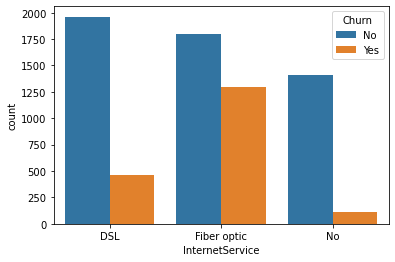

In [15]:
# Relationship between InternetService  and Churn


sns.countplot("InternetService", data=df, hue = 'Churn')

In [16]:
# Clearly fiber optic internet service churn rate is higher than DSL service
# Customers with no internet service have lower churn rate

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

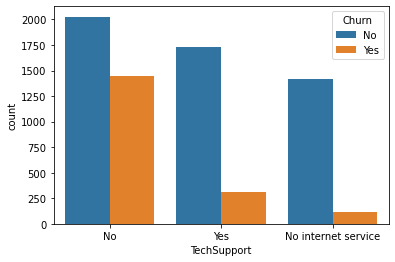

In [17]:
# Relationship between TechSupport  and Churn

sns.countplot(x='TechSupport',data=df, hue='Churn')

In [18]:
# Customers with no tech support have higher churn rate

<AxesSubplot:xlabel='tenure', ylabel='Count'>

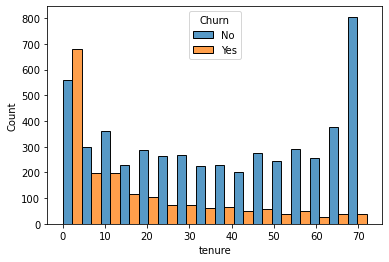

In [19]:
# Relationship between tenure  and Churn

sns.histplot(x = 'tenure', hue = 'Churn', data = df,multiple='dodge')

In [20]:
# Clearly above plot shows that with increase in tenure churn rate decreases

In [21]:
# converting categorical features into ordinal

df_copy=df
col=['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']
df_copy=df_copy.drop(col,axis=1)
le= LabelEncoder()
for i in df_copy:   
    df[i] = le.fit_transform(df[i]) 

In [22]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.5,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [23]:
df['MonthlyCharges'] = df['MonthlyCharges'].astype(int)


In [24]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56,1889.5,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70,151.65,1


In [25]:
# removing customerID column

df.drop(['customerID','TotalCharges'],axis=1,inplace=True)

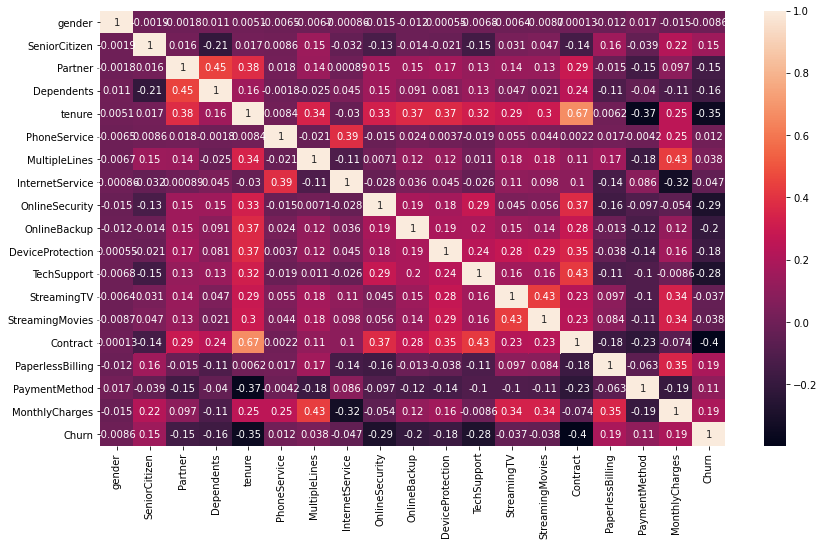

In [26]:
# checking correlation of independent variables with 'Churn' variable

plt.figure(figsize=(14,8))
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [27]:
corr_matrix['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193422
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

<AxesSubplot:>

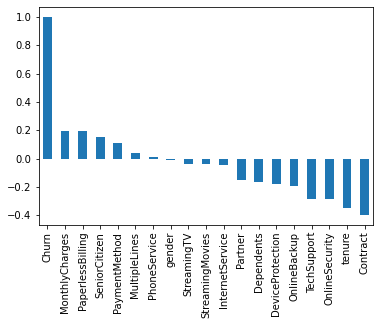

In [28]:
corr_matrix['Churn'].sort_values(ascending=False).plot(kind='bar')

In [29]:
X=df.drop(['Churn'],axis=1)
y=df['Churn']

In [30]:
# Scaling the dataset


from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)


In [31]:
# Oversampling of dataset

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X, y = sm.fit_resample(X, y)


In [32]:
y.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [33]:
# Evaluating models

# Training the model using LogisticRegression and evaluating the model

import numpy as np

from sklearn.model_selection import train_test_split

model_lr_1 = LogisticRegression()

score_s=0
state=0
for i in range(0,25):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =i)
    model_lr_1.fit(X_train, y_train)
    y_pred_lr_1 = model_lr_1.predict(X_test)
    score=accuracy_score(y_test,y_pred_lr_1)
    if score>score_s:
        score_s=score
        state=i
        
print('best random_state for LogisticRegression : ',state)
print('best accuracy score for LogisticRegression : ',score_s)

best random_state for LogisticRegression :  0
best accuracy score for LogisticRegression :  0.7829307568438003


In [34]:
# Accuracy score for LogisticRegression on training data

y_pred_lr_train = model_lr_1.predict(X_train)
score_train=accuracy_score(y_train,y_pred_lr_train)
print('best accuracy score for LogisticRegression on training data : ',score_train)

best accuracy score for LogisticRegression on training data :  0.7726080353444705


In [35]:
# Clearly there is no overfitting as accuracy score for LogisticRegression on training data  is similar to test data

In [36]:
# finding classification_report for LogisticRegression without removing overfitting

print(classification_report(y_test, y_pred_lr_1))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77      1588
           1       0.74      0.84      0.79      1517

    accuracy                           0.78      3105
   macro avg       0.78      0.78      0.78      3105
weighted avg       0.78      0.78      0.78      3105



In [37]:
# finding cross validation score without removing overfitting

cvs = cross_val_score(LogisticRegression(), X_test, y_test, scoring='accuracy', cv = 10).mean()
print("cross_val_score for LogisticRegression : ",cvs)

cross_val_score for LogisticRegression :  0.7719614147909969


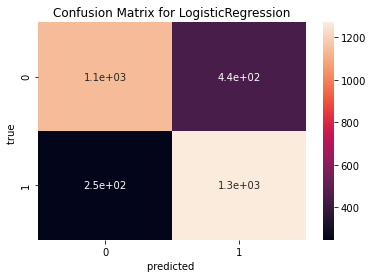

In [38]:
# confusion matrix of LogisticRegression model

cm=confusion_matrix(y_test,y_pred_lr_1)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True)
plt.xlabel("predicted ")
plt.ylabel("true ")
plt.title('Confusion Matrix for LogisticRegression')
plt.show()

In [39]:
# Training the model using DecisionTreeClassifier and evaluating the model

import numpy as np

from sklearn.model_selection import train_test_split

model_dtc = DecisionTreeClassifier()

score_s=0
state=0
for i in range(0,25):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =i)
    model_dtc.fit(X_train, y_train)
    y_pred_dtc = model_dtc.predict(X_test)
    score=accuracy_score(y_test,y_pred_dtc)
    if score>score_s:
        score_s=score
        state=i
        
print('best random_state for DecisionTreeClassifier : ',state)
print('best accuracy score for DecisionTreeClassifier : ',score_s)

best random_state for DecisionTreeClassifier :  24
best accuracy score for DecisionTreeClassifier :  0.8038647342995169


In [40]:
# finding classification_report for DecisionTreeClassifier

print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1588
           1       0.79      0.82      0.80      1517

    accuracy                           0.80      3105
   macro avg       0.80      0.80      0.80      3105
weighted avg       0.80      0.80      0.80      3105



In [41]:
# finding cross validation score for DecisionTreeClassifier 

cvs = cross_val_score(DecisionTreeClassifier(), X_test, y_test, scoring='accuracy', cv = 10).mean()
print("cross_val_score for DecisionTreeClassifier  : ",cvs)

cross_val_score for DecisionTreeClassifier  :  0.7555471424126129


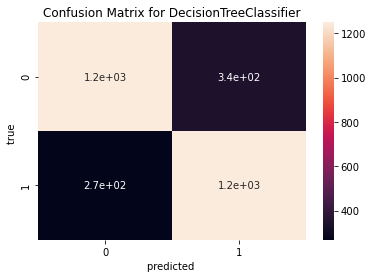

In [42]:
# confusion matrix of DecisionTreeClassifier  model

cm=confusion_matrix(y_test,y_pred_dtc)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True)
plt.xlabel("predicted ")
plt.ylabel("true ")
plt.title('Confusion Matrix for DecisionTreeClassifier')
plt.show()

In [43]:
# Training the model using  KNeighborsClassifier and evaluating the model

import numpy as np

from sklearn.model_selection import train_test_split

model_knc = KNeighborsClassifier()

score_s=0
state=0
for i in range(0,25):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =i)
    model_knc.fit(X_train, y_train)
    y_pred_knc = model_knc.predict(X_test)
    score=accuracy_score(y_test,y_pred_knc)
    if score>score_s:
        score_s=score
        state=i
        
print('best random_state : ',state)
print('best accuracy score : ',score_s)


best random_state :  9
best accuracy score :  0.7884057971014493


In [44]:
# finding classification_report for KNeighborsClassifier

print(classification_report(y_test, y_pred_knc))

              precision    recall  f1-score   support

           0       0.87      0.65      0.74      1588
           1       0.71      0.90      0.79      1517

    accuracy                           0.77      3105
   macro avg       0.79      0.77      0.77      3105
weighted avg       0.79      0.77      0.77      3105



In [45]:
# finding cross validation score for  KNeighborsClassifier

accuracy = cross_val_score( KNeighborsClassifier(), X_test, y_test, scoring='accuracy', cv = 10).mean()
print(accuracy)

0.7581163779690903


In [48]:
# Training the model using SVC and evaluating the model

import numpy as np

from sklearn.model_selection import train_test_split

model_svc =SVC()

score_s=0
state=0
for i in range(0,25):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =i)
    model_svc.fit(X_train, y_train)
    y_pred_svc = model_svc.predict(X_test)
    score=accuracy_score(y_test,y_pred_svc)
    if score>score_s:
        score_s=score
        state=i
        
print('best random_state for SVC model : ',state)
print('best accuracy score for SVC model : ',score_s)


best random_state for SVC model :  12
best accuracy score for SVC model :  0.814170692431562


In [49]:
# finding classification_report for SVC

print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1588
           1       0.78      0.85      0.81      1517

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.81      3105
weighted avg       0.81      0.81      0.81      3105



In [46]:
#Training model with RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
model_rfl = RandomForestClassifier(random_state=10)
model_rfl.fit(X_train, y_train)
y_pred_rfl = model_rfl.predict(X_test)

accuracy_score(y_test,y_pred_rfl)

0.855072463768116

In [47]:
# finding cross validation score

from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(RandomForestClassifier(random_state=10), X, y, scoring='accuracy', cv = 10).mean()
print(accuracy)

0.8566022855754586


In [ ]:
# Clearly among all models ,RandomForestClassifier model is giving a good accuracy score and cross validation score.

In [50]:
# HyperParameterTuning

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV

parameters={'max_features':['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':['ginni','entropy']}

GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(X_train,y_train)
GCV.best_params_  # Printing the best parameter found by GridSearchCV


GCV_pred=GCV.best_estimator_.predict(X_test)   # predicting the best parameters
accuracy_score(y_test,GCV_pred)    # checking final accuracy


0.828341384863124

In [ ]:
# Final accuracy_score clearly states that RandomForestClassifier model is very good enough to predict churn

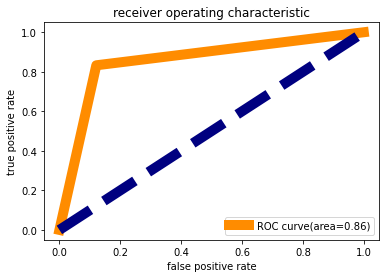

In [51]:
# AUC_ROC curve

from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_pred_rfl,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Above roc_curve area clearly states the goodness of RandomForestClassifier model for predicting customer churn

In [52]:
# Exporting the model through pickle

import pickle
filename='customer_churn.pkl'
pickle.dump(model_rfl,open(filename,'wb'))

In [53]:
# Conclusion:

import numpy as np
a=np.array(y_test)
predicted=np.array(model_rfl.predict(X_test))
df_com=pd.DataFrame({'original':a,'predcited':predicted},index=range(len(a)))
df_com

,original,predcited
0,1,1
1,1,1
2,0,0
3,0,0
4,0,1
...,...,...
3100,0,0
3101,0,0
3102,0,1
3103,1,1
